# Project description
Urban mobility significantly contributes to global environmental impact. With the growth in urbanareas worldwide, cities are implementing policies to focus on sustainable urban and mobility devel-opment. Urban areas exhibit high variability in structure, economic output, mobility behaviour,among others. Pinpointing to the exact causes of emissions is impossible. However, understandingthe relationship of mobility with infrastructure resources and other urban indicators may help gov-ernments predict long-term mobility behaviour and intervene with future pathways into sustainablemobility options. </br>

Project goals: You are tasked to identify how mobility is related to the infrastructural form of acity and across multiple cities. Use your findings toward helping governments transform mobilitywithin cities for reducing environmental impacts of mobility use.
Data: </br>
1. Local city-wide indicators of urban mobility: Multi-city Traffic Datasetprovided publicly byThe Institute for Transport Planning and Systems at ETH Zurich.
2. Global city-wide indicators of urban mobility and environmental impacts:Urban TypologiesProject[Reference]3.Get indicators for infrastructure resources from OSMNX (street networks) and PYROSM(amenities and points of interest) python packages.High-level project goals1.Explore, Investigate, and Visualize various factors of the mobility data across cities of interest.2.Describe and incorporate additional data sources that you will use to help you understandrelationships between mobility and the built environment.
3. Identify correlations between mobility and the built environment.4.Perform clustering or LISA analysis on city streets where congestion may be related stronglywith the presence of certain amenities. Think about how that may vary with distance toamenities.
4. Or, train and evaluate models using the mobility data (either as predictors or as the primaryresponse in some fashion) and your data sources.
6. Use and interpret your models to discuss the causes and correlations of or effects due todifferences in congestion across cities or within a city of your choice.
7. Aggregate city-wide findings to correlate with environmental indicators used in data set (2) -urban typology - to comment on policy initiatives of the governments. (Think how you mayaggregate city-wide findings to a single score for the whole city to compare with indicatorsused in data set 

(2))Note: Not all data may be available for all cities. Hence, conduct this analysis for at least5citiesoverlapping between sets1and2in the data. You are welcome to do the analysis in many morecities.


In [1]:
# import 
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pyrosm as py
import seaborn as sns
import pickle

### Load graphs

In [2]:
UTD19 = pd.read_csv('Data/detectors_public.csv') # read big file with all cities 
newcitylist= [ 'munich', 'rotterdam', 'frankfurt', 'hamburg', 'zurich'] # find only our cities for now, store in dataframe
UTD19Cities = UTD19.loc[UTD19.citycode.isin(newcitylist)] # UTD19Cities is dataframe

In [3]:
def GetGraphs(df):
    # function designed to extract bbox and create graphs with bbox
    clist = df.citycode.unique()
    GraphList = []
    for i in clist:
        maxlonglt = df.loc[df.citycode == i, ['long', 'lat']].max() # maxlonglat[0] = long, 1 lat
        minlonglt = df.loc[df.citycode == i, ['long', 'lat']].min() #
        north = maxlonglt[1] 
        south = minlonglt[1]
        east = maxlonglt[0]
        west = minlonglt[0]
        A = ox.graph.graph_from_bbox(north, south, east, west, network_type='drive')
        GraphList.append(A)
    return GraphList
        
Graphs = GetGraphs(UTD19Cities)

### Load POIS

In [4]:
# de filepaths zin nu specifiek voor mijn computer, moet je zelf even aanpassen naar waar die van jou staan
fp_rotterdam ="data/rotterdam.osm.pbf"
fp_munich ="data/munich.osm.pbf"
fp_zurich ="data/zurich.osm.pbf"
fp_hamburg ="data/hamburg.osm.pbf"
fp_frankfurt ="data/frankfurt.osm.pbf"

C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None,
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None,
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

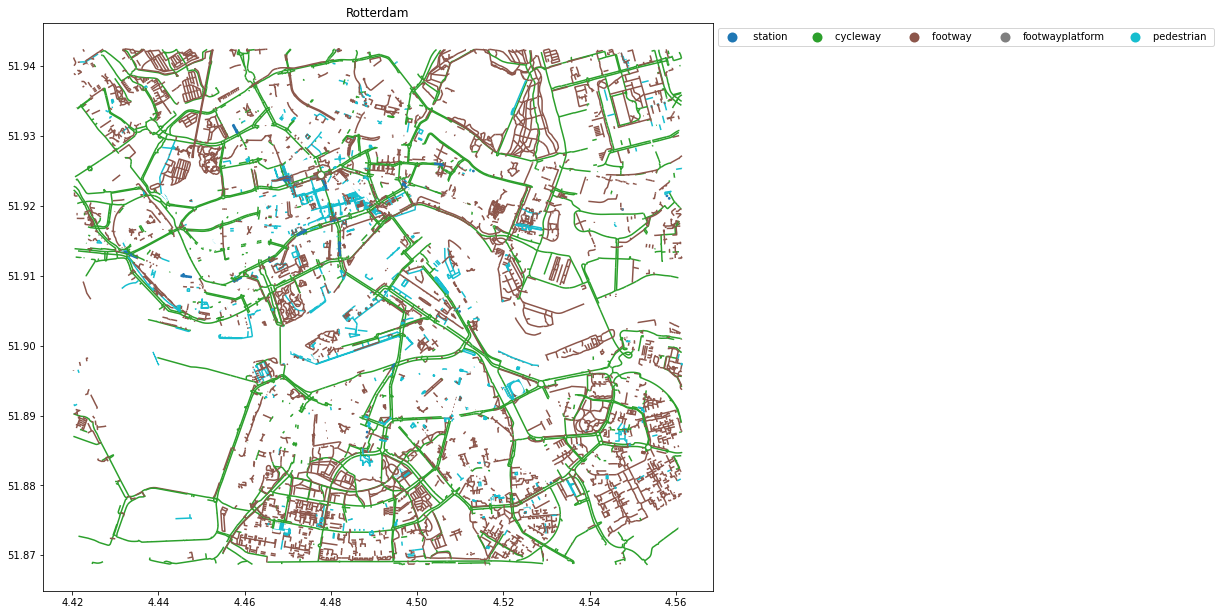

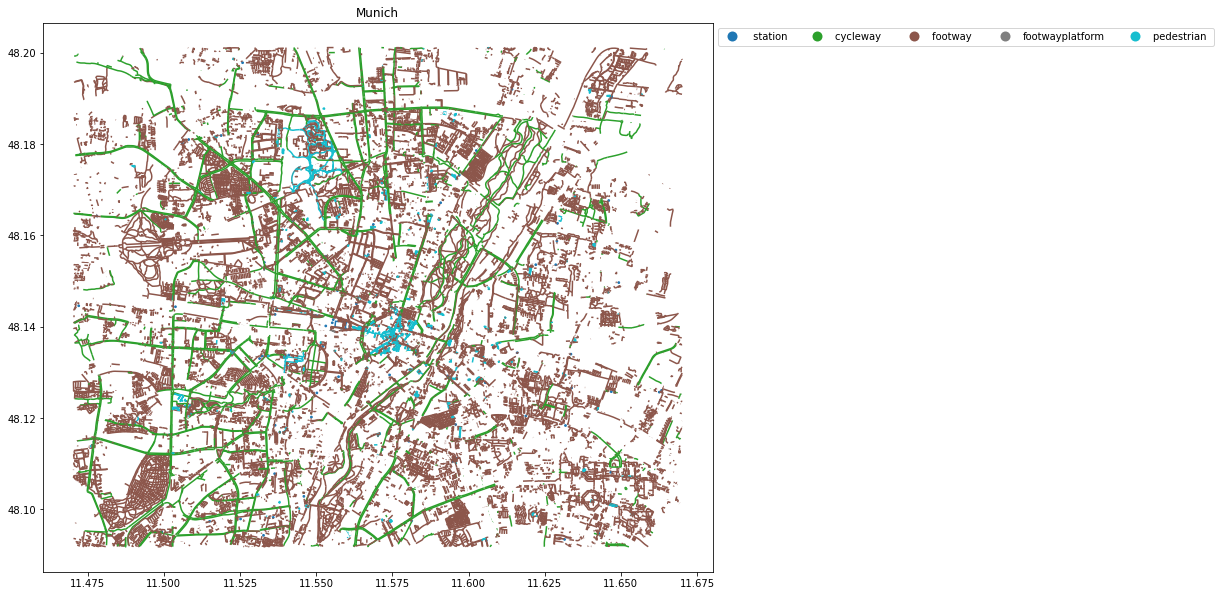

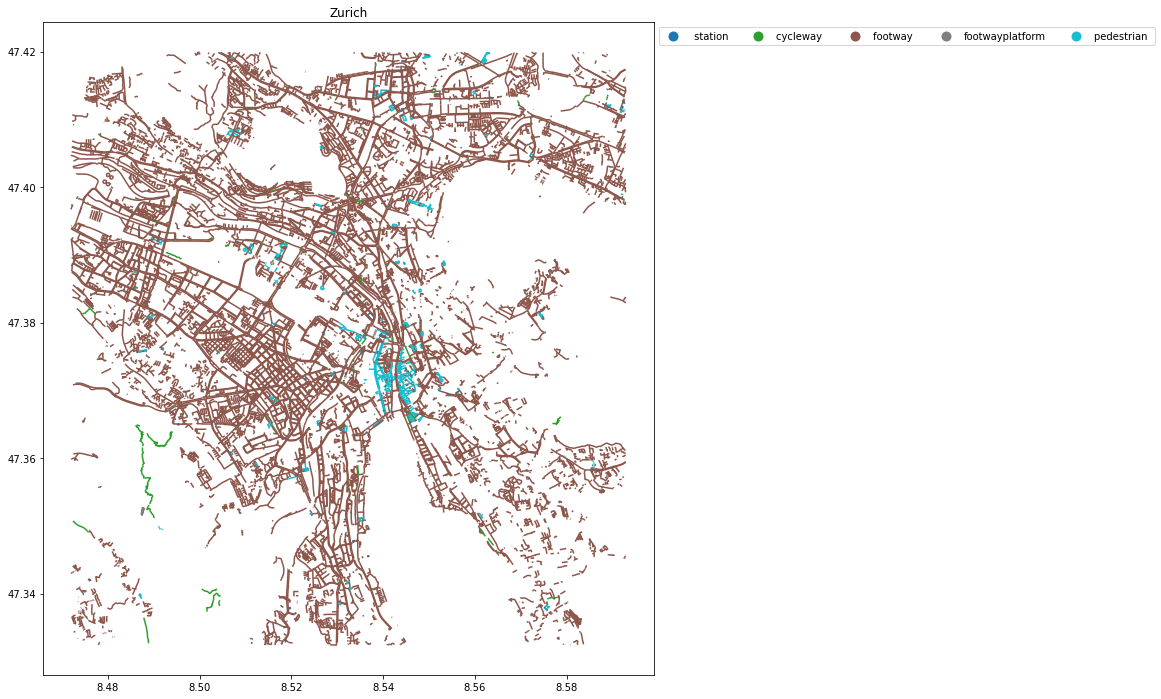

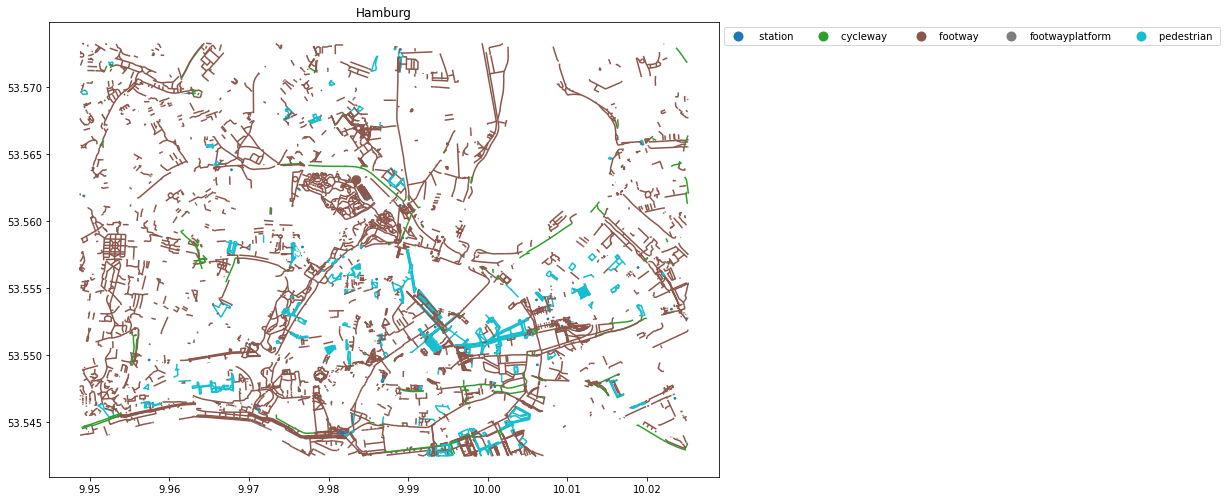

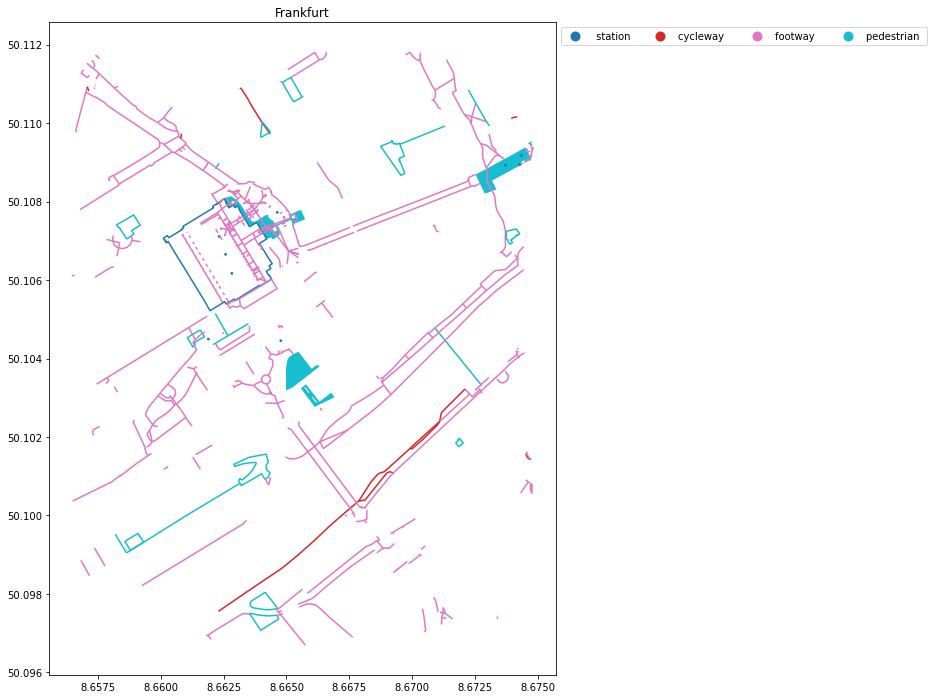

In [5]:
#alternative transport options
for i,v in [(fp_rotterdam, 'Rotterdam'), (fp_munich, 'Munich') , (fp_zurich, 'Zurich'), (fp_hamburg, 'Hamburg'), (fp_frankfurt, 'Frankfurt')]:    # Initiliaze with bounding box
    osm = py.OSM(filepath=i)

    # By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
    # Here, let's read only "amenity" and "shop" by applying a custom filter that
    # overrides the default filtering mechanism
    custom_filter = {'public_transport': ['station'], 'highway': ['pedestrian', 'footway', 'cycleway', 'busway']}
    pois = osm.get_pois(custom_filter=custom_filter)

    # Gather info about POI type (combines the tag info from "amenity" and "shop")
    pois["public_transport"] = pois["public_transport"].fillna(" ")
    pois["highway"] = pois["highway"].fillna(" ")
    pois["poi_type"] = pois["highway"] + pois['public_transport']

    # Plot
    ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
    ax.set_title(v)
    pois.head()

### Load pickle

In [6]:

# Load data (deserialize)
with open('Edges.pickle', 'rb') as handle:
    dic = pickle.load(handle)

dic['rotterdam']


osmid                     name  \
0      [311806104, 311806106, 321898179]             's-Gravenweg   
1                                7514536       Frans Bekkerstraat   
2                                7515679       Frans Bekkerstraat   
3                     [7515714, 7515628]            Verboomstraat   
4                                7319072  Schultz van Hagenstraat   
...                                  ...                      ...   
17153                            7513502                Putselaan   
17154               [494919621, 7513646]                Putselaan   
17155                            7515716           Kesterenstraat   
17156                            7515718                      NaN   
17157                            7515716           Kesterenstraat   

            highway  oneway   length bridge  \
0       residential   False   88.311    yes   
1       residential   False   61.119    NaN   
2       residential   False   76.835    NaN   
3       residential   False  145.552    NaN   
4       residential   False   48.438    NaN   
...             ...     ...      ...    ...   
17153   residential    True   74.466    NaN   
17154     secondary    True  269.995    NaN   
17155  unclassified   False   31.071    NaN   
17156  unclassified   False   21.159    NaN   
17157  unclassified   False   56.304    NaN   

                                                geometry maxspeed lanes   ref  \
0      LINESTRING (4.52452 51.92392, 4.52412 51.92331...      NaN   NaN   NaN   
1        LINESTRING (4.46527 51.89180, 4.46613 51.89165)      NaN   NaN   NaN   
2      LINESTRING (4.46527 51.89180, 4.46496 51.89218...       50   NaN   NaN   
3      LINESTRING (4.46527 51.89180, 4.46528 51.89177...       50   NaN   NaN   
4        LINESTRING (4.52872 51.92385, 4.52848 51.92344)      NaN   NaN   NaN   
...                                                  ...      ...   ...   ...   
17153  LINESTRING (4.50077 51.89826, 4.50060 51.89831...      NaN   NaN   NaN   
17154  LINESTRING (4.50077 51.89826, 4.49987 51.89819...       50     3  S120   
17155    LINESTRING (4.45556 51.89186, 4.45522 51.89205)      NaN   NaN   NaN   
17156    LINESTRING (4.45556 51.89186, 4.45563 51.89205)      NaN   NaN   NaN   
17157  LINESTRING (4.45556 51.89186, 4.45570 51.89183...      NaN   NaN   NaN   

      junction tunnel access          u           v  key detid  
0          NaN    NaN    NaN   44417024   771255062    0   NaN  
1          NaN    NaN    NaN   44269570    44269098    0   NaN  
2          NaN    NaN    NaN   44269570   963879003    0   NaN  
3          NaN    NaN    NaN   44269570    44262667    0   NaN  
4          NaN    NaN    NaN   44417028    44412933    0   NaN  
...        ...    ...    ...        ...         ...  ...   ...  
17153      NaN    NaN    NaN  735821821   735821808    0   NaN  
17154      NaN    NaN    NaN  735821821  4801683177    0   NaN  
17155      NaN    NaN    NaN   44269566    44270495    0   NaN  
17156      NaN    NaN    NaN   44269566    44270498    0   NaN  
17157      NaN    NaN    NaN   44269566    44270026    0   NaN  

[17158 rows x 17 columns]

### Load flows

In [7]:
data_frankfurt = pd.read_csv('data\\UTD_f.csv')
data_hamburg = pd.read_csv('data/UTD_h.csv')
data_munich = pd.read_csv('data\\UTD_m.csv')
data_rotterdam = pd.read_csv('data\\UTD_r.csv')
data_zurich = pd.read_csv('data\\UTD_z.csv')

In [8]:
frankfurt_detid_average = (data_frankfurt.groupby('detid').flow.mean()).to_frame(name = None)
hamburg_detid_average = (data_hamburg.groupby('detid').flow.mean()).to_frame(name = None)
munich_detid_average = (data_munich.groupby('detid').flow.mean()).to_frame(name = None)
rotterdam_detid_average = (data_rotterdam.groupby('detid').flow.mean()).to_frame(name = None)
zurich_detid_average = (data_zurich.groupby('detid').flow.mean()).to_frame(name = None)

In [9]:
frankfurt_detid_average['city'] = 'frankfurt'
hamburg_detid_average['city'] = 'hamburg'
munich_detid_average['city'] = 'munich'
rotterdam_detid_average['city'] =  'rotterdam'
zurich_detid_average['city'] = 'zurich'

In [10]:
Mean_perdetid = pd.concat([frankfurt_detid_average,
                                  hamburg_detid_average,
                                  munich_detid_average,
                                  rotterdam_detid_average,
                                  zurich_detid_average])
          

In [11]:
result = Mean_perdetid.to_csv('data\\UTD_Mean_Flow_per_detid.csv', index = True)#exporting data frame as csv file.

### Correlation

In [14]:
# try plotting the flow on the OSMNX graph
hamburg_detid_average.reset_index(inplace = True)
frankfurt_detid_average.reset_index(inplace = True)
munich_detid_average.reset_index(inplace = True)
rotterdam_detid_average.reset_index(inplace = True)
zurich_detid_average.reset_index(inplace = True)

#df['ColumnID'] = df['ColumnID'].astype(str)
munich_detid_average.detid = munich_detid_average.detid.astype(str)

In [15]:
H = dic['hamburg']
def Match(detid, df):
    if type(detid) == str:
        flowval = df.loc[df.detid == detid, 'flow'].values # get specific value
        try:
            flowval = float(flowval) # convert array to float
            return flowval
        except:
            # list empty
            return np.nan
    
    
H['flow'] = H['detid'].apply(Match, args = [hamburg_detid_average])
#H['detid'].apply(Match, args = [hamburg_detid_average])
    

In [17]:
F = dic['frankfurt']
# H = dic['Hamburg'] # skip, allready done
M = dic['munich']
R = dic['rotterdam']
Z = dic['zurich']

F['flow'] = F['detid'].apply(Match, args = [frankfurt_detid_average])
#M['flow'] = M['detid'].apply(Match, args = [munich_detid_average])
R['flow'] = R['detid'].apply(Match, args = [rotterdam_detid_average])
Z['flow'] = Z['detid'].apply(Match, args = [zurich_detid_average])
H['flow'] = H['detid'].apply(Match, args = [hamburg_detid_average])


In [18]:
M['flow'] = M['detid'].apply(Match, args = [munich_detid_average])

In [20]:
pois['x'] = pois.geometry.centroid.x
pois['y'] = pois.geometry.centroid.y


C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [25]:
F['x'] = F.geometry.centroid.x
F['y'] = F.geometry.centroid.y

C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


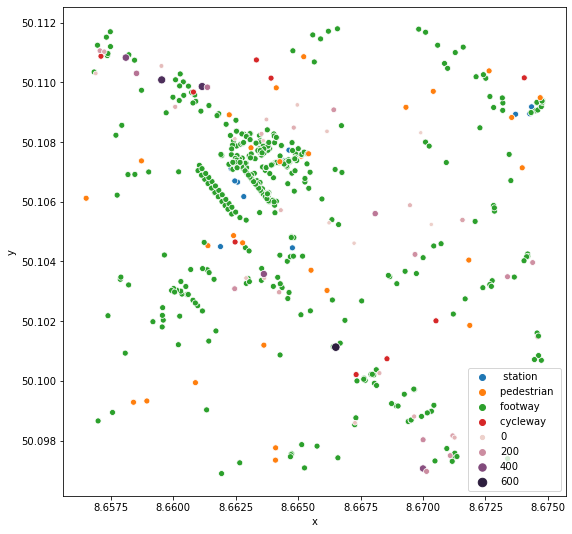

In [26]:
import seaborn as sns
f, ax = plt.subplots(figsize=(9,9))
sns.scatterplot(x = 'x', y = 'y', ax = ax, data = pois, hue = pois['poi_type'].to_list())
#color = sns.color_palette('hls', 8)
flows = sns.scatterplot(x = 'x', y = 'y', ax =ax , data = F, hue = F['flow'].to_list(), size = F['flow'].to_list())
#plt.colorbar(flows)
#ax.legend()